## Finite Differences

## Forward Euler

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# suppress scientific notation for now
np.set_printoptions(suppress=True)
pd.options.display.float_format = '{:.4f}'.format

In [2]:
v=0.25
lbg=0.1
k=0.0003
kbg=0.4
I0=300.0
mumax=1.2
rhomax=0.2
m=15.0
qmax=0.04
qmin=0.004
h=120.0
d=10.0
# Redfield ratio = 0.022 for q

A1_guess = 100.0
Rb1_guess = 2.2
Rd1_guess = 30.0

zmax = 20
delta_z = 0.001

In [3]:
def p(I,q):
    return mumax * (1 - qmin/q) * (I/(h + I))

def rho(q, Rd):
    return rhomax * (qmax-q)/(qmax-qmin) * ( Rd/(m + Rd) )

initial_conditions = np.array([A1_guess,
                              v*A1_guess/d,
                              Rb1_guess,
                              v*Rb1_guess/d,
                              Rd1_guess,
                              0.0,
                              I0])

np.set_printoptions(suppress=True)
print(initial_conditions)

[100.      2.5     2.2     0.055  30.      0.    300.   ]


In [4]:
def step_forward(y, z_start, delta_z):
    """Forward Euler next step where y is a vector of length 7 of initial guesses."""
    A1 = y[0]
    A2 = y[1]
    Rb1 = y[2]
    Rb2 = y[3]
    Rd1 = y[4]
    Rd2 = y[5]
    I = y[6]
    q = Rb1/A1
    
    A1_next = A1 + delta_z*A2
    A2_next = A2 + (delta_z/d)*(v*A2 - p(I,q)*A1 + lbg*A1)
    Rb1_next = Rb1 + delta_z*Rb2
    Rb2_next = Rb2 + (delta_z/d)*(v*Rb2 - rho(q,Rd1)*A1 - lbg*Rb1)
    Rd1_next = Rd1 + delta_z*Rd2
    Rd2_next = Rd2 + (delta_z/d)*(rho(q,Rd1)*A1 - lbg*Rb1)
    I_next = I - delta_z*(k*A1 + kbg)*I
    
    return np.array([A1_next,
                     A2_next,
                     Rb1_next,
                     Rb2_next,
                     Rd1_next,
                     Rd2_next,
                     I_next])

In [5]:
first_step = step_forward(initial_conditions,0,delta_z)
stepdict = {'z0': initial_conditions, 'z1': first_step}
pd.DataFrame(stepdict, index=['A1','A2','Rb1','Rb2','Rd1','Rd2','I'])

z0       z1
A1  100.0000 100.0025
A2    2.5000   2.4940
Rb1   2.2000   2.2001
Rb2   0.0550   0.0543
Rd1  30.0000  30.0000
Rd2   0.0000   0.0006
I   300.0000 299.8710

## Stepping over z

In [32]:
z_steps = np.arange(0.0,zmax,delta_z) 
steps = np.empty([len(initial_conditions),len(z_steps)])
steps[:,0] = initial_conditions

i=0
for z in z_steps[:-1]:
    i=i+1
    steps[:,i] = step_forward(steps[:,i-1], z, delta_z)

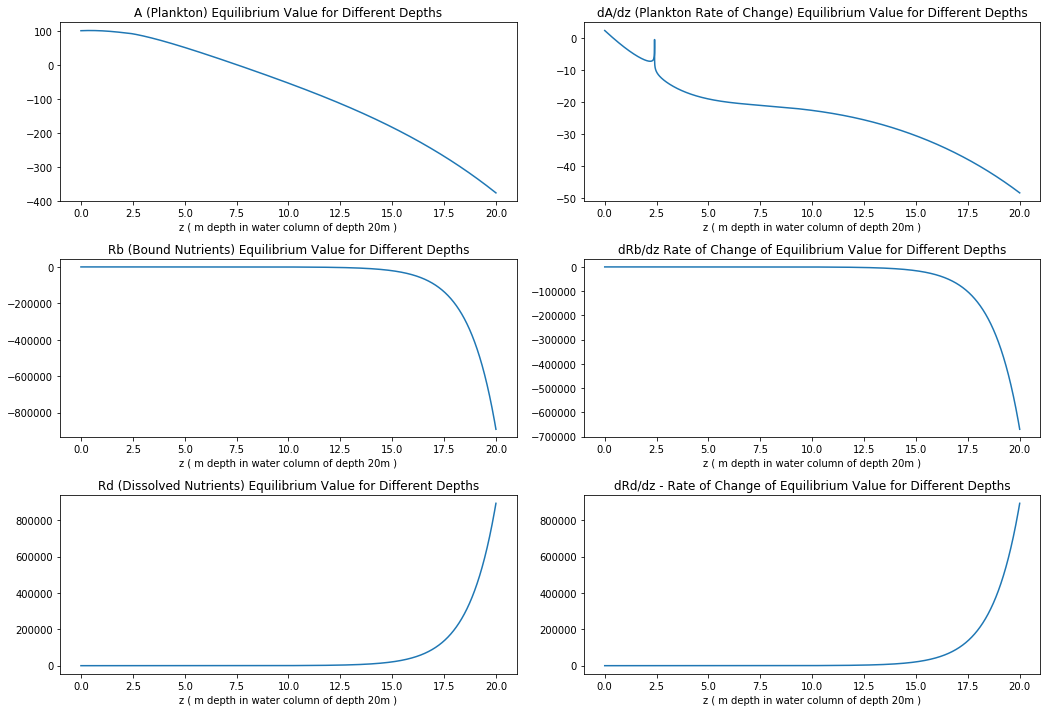

In [33]:
fig, axs = plt.subplots(3,2, figsize=(15,10))

axs[0,0].plot(z_steps,steps[0,:])
axs[0,0].set_title('A (Plankton) Equilibrium Value for Different Depths')
axs[0,0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[0,1].plot(z_steps,steps[1,:])
axs[0,1].set_title('dA/dz (Plankton Rate of Change) Equilibrium Value for Different Depths')
axs[0,1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[1,0].plot(z_steps,steps[2,:])
axs[1,0].set_title('Rb (Bound Nutrients) Equilibrium Value for Different Depths')
axs[1,0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[1,1].plot(z_steps,steps[3,:])
axs[1,1].set_title('dRb/dz Rate of Change of Equilibrium Value for Different Depths')
axs[1,1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[2,0].plot(z_steps,steps[4,:])
axs[2,0].set_title('Rd (Dissolved Nutrients) Equilibrium Value for Different Depths')
axs[2,0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[2,1].plot(z_steps,steps[4,:])
axs[2,1].set_title('dRd/dz - Rate of Change of Equilibrium Value for Different Depths')
axs[2,1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

plt.tight_layout()

Text(0.5, 0, 'z ( m depth in water column of depth 20m )')

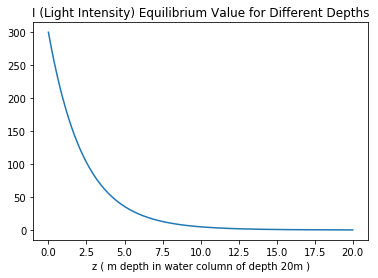

In [34]:
plt.plot(z_steps,steps[6,:])
plt.title('I (Light Intensity) Equilibrium Value for Different Depths')
plt.xlabel('z ( m depth in water column of depth {}m )'.format(zmax))


In [39]:
steps_df = pd.DataFrame(steps, index = ['A1','A2','Rb2','Rb2','Rd1','Rd2','I'])
steps_df

0        1        2        3        4        5        6        7       \
A1  100.0000 100.0002 100.0005 100.0007 100.0010 100.0012 100.0015 100.0017   
A2    2.5000   2.4994   2.4988   2.4982   2.4976   2.4970   2.4964   2.4958   
Rb2   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   2.2000   
Rb2   0.0550   0.0549   0.0549   0.0548   0.0547   0.0547   0.0546   0.0545   
Rd1  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000   
Rd2   0.0000   0.0001   0.0001   0.0002   0.0003   0.0003   0.0004   0.0005   
I   300.0000 299.9871 299.9742 299.9613 299.9484 299.9355 299.9226 299.9097   

      8        9       ...       199990       199991       199992  \
A1  100.0020 100.0022  ...    -374.9682    -374.9731    -374.9779   
A2    2.4952   2.4946  ...     -48.3952     -48.3956     -48.3961   
Rb2   2.2000   2.2000  ... -891138.5487 -891205.4910 -891272.4383   
Rb2   0.0545   0.0544  ... -669422.7377 -669473.0262 -669523.3184   
Rd1  30.0000  30.0000  ...  893118.8694  893185.9568  893253.0492   
Rd2   0.0005   0.0006  ...  670873.8480  670924.2451  670974.6461   
I   299.8968 299.8839  ...       0.1582       0.1582       0.1582   

          199993       199994       199995       199996       199997  \
A1     -374.9828    -374.9876    -374.9924    -374.9973    -375.0021   
A2      -48.3966     -48.3971     -48.3976     -48.3981     -48.3986   
Rb2 -891339.3906 -891406.3480 -891473.3104 -891540.2778 -891607.2502   
Rb2 -669573.6144 -669623.9142 -669674.2178 -669724.5251 -669774.8362   
Rd1  893320.1466  893387.2491  893454.3567  893521.4693  893588.5869   
Rd2  671025.0508  671075.4594  671125.8717  671176.2878  671226.7077   
I         0.1582       0.1582       0.1582       0.1582       0.1582   

          199998       199999  
A1     -375.0070    -375.0118  
A2      -48.3991     -48.3996  
Rb2 -891674.2277 -891741.2102  
Rb2 -669825.1511 -669875.4698  
Rd1  893655.7096  893722.8373  
Rd2  671277.1313  671327.5588  
I         0.1582       0.1582  

[7 rows x 200000 columns]

In [43]:
negA1 = steps_df.columns[steps_df.loc['A1',:] < 0][0]
print('A1 becomes negative at step {} and depth z = {}.'.format(negA1,z_steps[negA1]))

A1 becomes negative at step 75269 and depth z = 7.5269.


In [27]:
steps_df.iloc[:,negA1-5:negA1+5]

8049      8050      8051      8052      8053      8054      8055  \
A1     0.0867    0.0674    0.0481    0.0288    0.0095   -0.0098   -0.0291   
A2   -19.2936  -19.2941  -19.2946  -19.2951  -19.2956  -19.2960  -19.2965   
Rb2 -125.4144 -125.5033 -125.5923 -125.6813 -125.7704 -125.8595 -125.9487   
Rb2  -88.8846  -88.9492  -89.0138  -89.0785  -89.1432  -89.2080  -89.2728   
Rd1  157.1356  157.2247  157.3138  157.4030  157.4923  157.5817  157.6711   
Rd2   89.0911   89.1560   89.2209   89.2859   89.3509   89.4159   89.4810   
I     10.2538   10.2497   10.2456   10.2415   10.2374   10.2333   10.2292   

         8056      8057      8058  
A1    -0.0484   -0.0677   -0.0870  
A2   -19.2970  -19.2975  -19.2980  
Rb2 -126.0380 -126.1273 -126.2167  
Rb2  -89.3377  -89.4026  -89.4675  
Rd1  157.7606  157.8501  157.9397  
Rd2   89.5462   89.6114   89.6766  
I     10.2251   10.2210   10.2169

## Central Difference Method

In [77]:
def step_forward_cdm(y0,y1, z_start, delta_z):
    """Cental Differemnce/Forward Euler next step where y1 and y0 are vectors of length 4 of initial guesses."""
    A0 = y0[0]
    Rb0 = y0[1]
    Rd0 = y0[2]
    I0 = y0[3]
    
    A1 = y1[0] #
    Rb1 = y1[1] #
    Rd1 = y1[2]
    I1 = y1[3]
    
    q = Rb1/A1
    
    A_next = delta_z**2/(v*delta_z - d) * ( (p(I1,q) - lbg + v/delta_z - 2*d/delta_z**2)*A1 ) + d*A0/(v*delta_z-d)
    
    Rb_next = delta_z**2/(v*delta_z - d) * ( rho(q,Rd1)*A1 + (v/delta_z - lbg - 2*d/delta_z**2)*Rb1) + d*Rb0/(v*delta_z-d)
    
    Rd_next = delta_z**2/d * (rho(q,Rd1)*A1 - lbg*Rb1) + 2*Rd1 - Rd0
    
    I_next = -delta_z * (k*A1 + kbg )*I1 + I1 # taking negative of this function for now
    
    return np.array([A_next,
                     Rb_next,
                     Rd_next,
                     I_next])

In [78]:
initial_conditions0 = initial_conditions[[0,2,4,6]]
initial_conditions1 = first_step[[0,2,4,6]]

In [79]:
delta_z = 0.00001 # blowing up
z_steps = np.arange(0.0,zmax,delta_z) 

steps_cdm = np.empty([len(initial_conditions0),len(z_steps)])
steps_cdm[:,0] = initial_conditions0
steps_cdm[:,1] = initial_conditions1

In [80]:
i=1
for z in z_steps[:-2]:
    i=i+1
    #print(i)
    steps_cdm[:,i] = step_forward_cdm(steps_cdm[:,i-2],steps_cdm[:,i-1], z, delta_z)
    
# Note: overflow/invalid value encountered in double_scalar encountered at i = 1408

In [81]:
steps_cdm_df = pd.DataFrame(steps_cdm, index=['A','Rb','Rd','I'])
steps_cdm_df

0        1        2        3        4        5        6        7        \
A  100.0000 100.0025 100.0050 100.0075 100.0100 100.0125 100.0150 100.0175   
Rb   2.2000   2.2001   2.2001   2.2002   2.2002   2.2003   2.2003   2.2004   
Rd  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000  30.0000   
I  300.0000 299.8710 299.8697 299.8684 299.8671 299.8658 299.8646 299.8633   

    8        9        ...       1999990       1999991       1999992  \
A  100.0200 100.0225  ...     8576.3899     8576.3998     8576.4097   
Rb   2.2004   2.2005  ... -8008298.4421 -8008359.6791 -8008420.9165   
Rd  30.0000  30.0000  ...  7746623.3956  7746682.6303  7746741.8654   
I  299.8620 299.8607  ...        0.0000        0.0000        0.0000   

         1999993       1999994       1999995       1999996       1999997  \
A      8576.4195     8576.4294     8576.4392     8576.4491     8576.4590   
Rb -8008482.1544 -8008543.3928 -8008604.6316 -8008665.8709 -8008727.1107   
Rd  7746801.1011  7746860.3371  7746919.5737  7746978.8106  7747038.0481   
I         0.0000        0.0000        0.0000        0.0000        0.0000   

         1999998       1999999  
A      8576.4688     8576.4787  
Rb -8008788.3510 -8008849.5917  
Rd  7747097.2859  7747156.5243  
I         0.0000        0.0000  

[4 rows x 2000000 columns]

In [83]:
#nullval = steps_cdm_df.columns[steps_cdm_df.isnull().any()][0]
#print("So the values become null at step {} and Rd is infinity at {}.".format(nullval,nullval-1))

In [85]:
#steps_cdm_df.iloc[:,nullval-1]

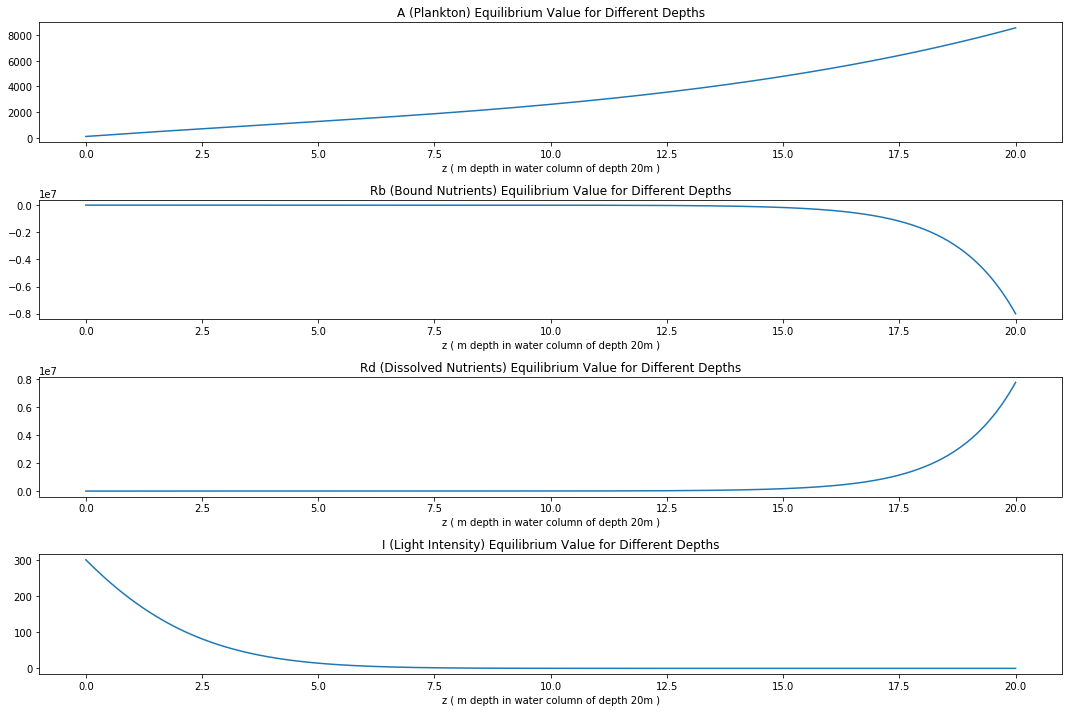

In [88]:
fig, axs = plt.subplots(4, figsize=(15,10))

axs[0].plot(z_steps,steps_cdm[0,:])
axs[0].set_title('A (Plankton) Equilibrium Value for Different Depths')
axs[0].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[1].plot(z_steps,steps_cdm[1,:])
axs[1].set_title('Rb (Bound Nutrients) Equilibrium Value for Different Depths')
axs[1].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[2].plot(z_steps,steps_cdm[2,:])
axs[2].set_title('Rd (Dissolved Nutrients) Equilibrium Value for Different Depths')
axs[2].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

axs[3].plot(z_steps,steps_cdm[3,:])
axs[3].set_title('I (Light Intensity) Equilibrium Value for Different Depths')
axs[3].set_xlabel('z ( m depth in water column of depth {}m )'.format(zmax))

plt.tight_layout()

In [71]:
(rho(q,Rd1)*A1 - lbg*Rb1)

9.838449142728475